# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("Dataset_clustering.csv")

In [3]:
df.head()

,num_reactions,num_likes,status_type_link,status_type_photo,status_type_status,status_type_video,Cluster
0,0.112314,0.091720,0,0,0,1,1
1,0.031847,0.031847,0,1,0,0,0
2,0.048195,0.043312,0,0,0,1,1
3,0.023567,0.023567,0,1,0,0,0
4,0.045223,0.043312,0,1,0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((5599, 6), (1400, 6))

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5599 entries, 1032 to 860
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       5599 non-null   float64
 1   num_likes           5599 non-null   float64
 2   status_type_link    5599 non-null   int64  
 3   status_type_photo   5599 non-null   int64  
 4   status_type_status  5599 non-null   int64  
 5   status_type_video   5599 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 306.2 KB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 6565 to 4154
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       1400 non-null   float64
 1   num_likes           1400 non-null   float64
 2   status_type_link    1400 non-null   int64  
 3   status_type_photo   1400 non-null   int64  
 4   status_type_status  1400 non-null   int64  
 5   status_type_video   1400 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 76.6 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Menggunakan Random Forest dan KNN

In [7]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Alasan Penggunaan Algoritma

Saya menggunakan **Random Forest** karena algoritma ini berbasis **ensemble learning**, di mana beberapa **decision tree** dibangun menggunakan **bootstrap sampling**, lalu hasilnya digabungkan melalui **voting**. Dengan cara ini, **Random Forest lebih stabil dan tahan terhadap overfitting dibandingkan decision tree biasa**. Selain itu, algoritma ini cukup **robust terhadap data yang memiliki banyak fitur** dan tidak terlalu terpengaruh oleh skala data. Dengan jumlah data sekitar **6000 sampel**, Random Forest masih cukup efisien dan dapat memberikan hasil yang baik dalam menangani **data dengan fitur yang kompleks**.  
 
Di sisi lain, saya juga menggunakan **KNN** karena algoritma ini berbasis **instance-based learning**, di mana prediksi dilakukan dengan **mencari titik data terdekat (neighbors) berdasarkan metrik tertentu** seperti **Euclidean Distance**. **KNN cenderung bekerja lebih baik pada dataset yang telah dinormalisasi**, sehingga bisa menjadi pembanding yang baik untuk **Random Forest**, yang tidak terlalu bergantung pada skala data. Selain itu, **KNN tidak membuat asumsi kuat tentang distribusi data**, sehingga dapat menjadi alternatif yang fleksibel.  

Dengan memilih Random Forest dan KNN, saya dapat menguji dua pendekatan yang berbeda dan mendapatkan wawasan lebih dalam mengenai karakteristik dataset ini. 
 

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### **Random Forest**

Melakukan Prediksi Menggunakan Data Uji (Test)

In [8]:
y_pred_rf = rf.predict(X_test)

Menghitung Metrik Evaluasi

In [9]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       473
           2       1.00      1.00      1.00        79

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



Membuat Confusion Matrix

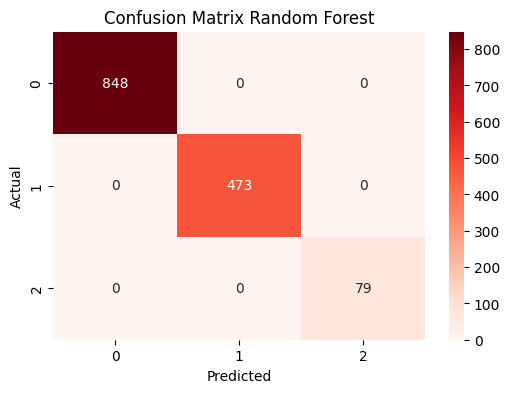

In [10]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **K-Nearest Neighbors (KNN)**

Melakukan Prediksi Menggunakan Data Uji (Test)

In [11]:
y_pred_knn = knn.predict(X_test)

Menghitung Metrik Evaluasi

In [12]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       473
           2       1.00      1.00      1.00        79

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



Membuat Confusion Matrix

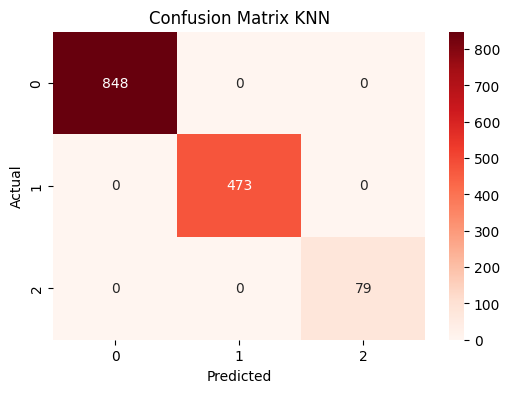

In [13]:
cm_knn = confusion_matrix(y_test, y_pred_knn) 
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix KNN')  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Metrik evaluasi tersebut menunjukan akurasi 100% dalam klasifikasi. Hal tersebut bisa terjadi karena data hasil clustering sudah sangat jelas terpisah tanpa overlap, sehingga model seperti **Random Forest dan KNN** dapat dengan mudah mengenali pola. Apalagi silhouette score sebelumnya pada tahapan clustering mencapai 0,92 yang membuktikan bahwa sudah ada pemisahan yang jelas pada masing-masing cluster. Hal ini membuat model klasifikasi bekerja dengan sangat mudah, karena batasannya sudah sangat tegas. Maka dari itu, tidak perlu dilakukan tuning.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [14]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [15]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.